In [1]:
#Importing the necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the csv as rec_hr
rec_hr= pd.read_csv('Recruitment_Data.csv')

In [3]:
rec_hr.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [4]:
rec_hr.shape

(446, 4)

In [5]:
rec_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


In [6]:
rec_hr.describe()

,attrition,performance_rating,sales_quota_pct
count,446.000000,446.000000,446.000000
mean,0.213004,2.894619,1.082607
std,0.409891,0.683755,0.710042
min,0.000000,1.000000,-0.710827
25%,0.000000,2.000000,0.584444
50%,0.000000,3.000000,1.070143
75%,0.000000,3.000000,1.532488
max,1.000000,5.000000,3.666740


Missing value

In [7]:
# finding missing value
100*rec_hr.isnull().mean()

attrition              0.000000
performance_rating     0.000000
sales_quota_pct        0.000000
recruiting_source     45.964126
dtype: float64

In [8]:
# Drop rows where 'recruiting_source' is NaN
rec_hr.dropna(subset=['recruiting_source'],inplace=True )

In [9]:
100*rec_hr.isnull().mean()

attrition             0.0
performance_rating    0.0
sales_quota_pct       0.0
recruiting_source     0.0
dtype: float64

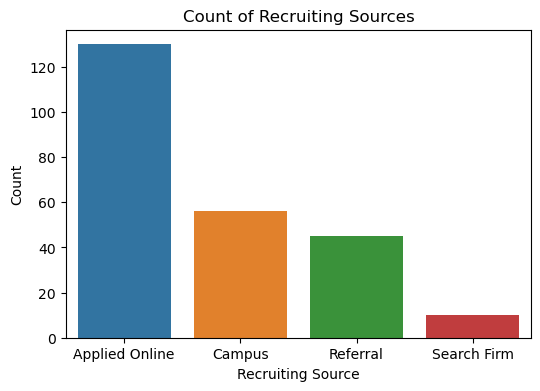

In [11]:
# Count of recruiting source
plt.figure(figsize=(6, 4))
sns.countplot(x='recruiting_source', data=rec_hr)
plt.title('Count of Recruiting Sources')
plt.xlabel('Recruiting Source')
plt.ylabel('Count')

plt.show()

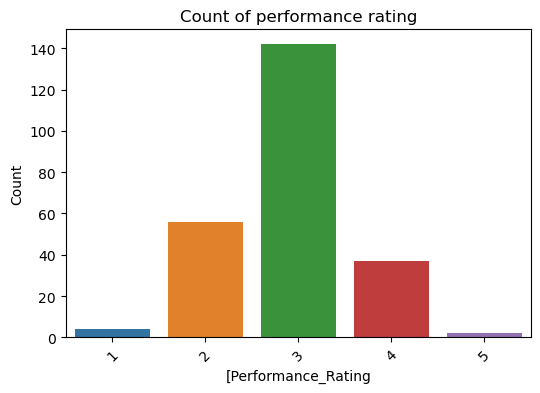

In [12]:
#Count of performance rating
plt.figure(figsize=(6, 4))
sns.countplot(x='performance_rating', data=rec_hr)
plt.title('Count of performance rating')
plt.xlabel('[Performance_Rating')
plt.ylabel('Count')
plt.xticks(rotation=45) 

# Display the plot
plt.show()

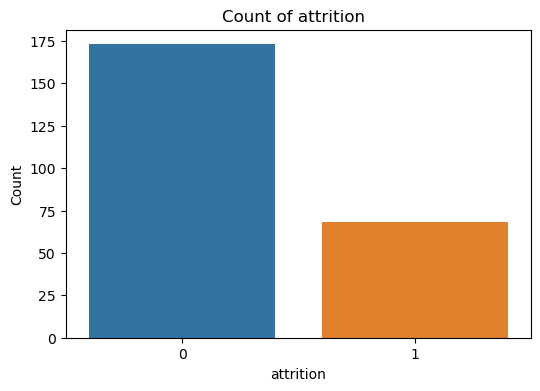

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='attrition', data=rec_hr)
plt.title('Count of attrition  ')
plt.xlabel('attrition')
plt.ylabel('Count')
# Display the plot
plt.show()

# Average sales and attrition

In [16]:
# Group the data by recruiting_source and calculate the average of Sales Number
avg_sales_by_source = rec_hr.groupby('recruiting_source')['sales_quota_pct'].mean()

In [17]:
# print Avg_sales_number
print(avg_sales_by_source)

recruiting_source
Applied Online    1.058590
Campus            0.908035
Referral          1.023198
Search Firm       0.886960
Name: sales_quota_pct, dtype: float64


In [18]:
# Group the data by recruiting_source and calculate the average of attrition
avg_attrition_by_source = rec_hr.groupby('recruiting_source')['attrition'].mean()

In [19]:
# print Avg_attrition_number
print(avg_attrition_by_source)

recruiting_source
Applied Online    0.246154
Campus            0.285714
Referral          0.333333
Search Firm       0.500000
Name: attrition, dtype: float64


# sources that have high Sales numbers and low Attrition numbers.

In [20]:
# Combine the results into a single DataFrame
average_performance_by_source = pd.DataFrame({
    'Average Sales': avg_sales_by_source,
    'Average Attrition': avg_attrition_by_source
})

In [21]:
# Sort the DataFrame by Average Sales (descending) and Average Attrition (ascending)
sorted_performance = average_performance_by_source.sort_values(by=['Average Sales', 'Average Attrition'],
ascending=[False, True])

In [22]:
print(sorted_performance)

                   Average Sales  Average Attrition
recruiting_source                                  
Applied Online          1.058590           0.246154
Referral                1.023198           0.333333
Campus                  0.908035           0.285714
Search Firm             0.886960           0.500000


In [23]:
# Find sources with high Sales numbers and low Attrition numbers
# Define thresholds for high sales and low attrition
high_sales_threshold = sorted_performance['Average Sales'].quantile(0.75)
low_attrition_threshold = sorted_performance['Average Attrition'].quantile(0.25)

In [24]:
# Filter sources that meet the criteria
high_sales_low_attrition_sources = sorted_performance[
    (sorted_performance['Average Sales'] >= high_sales_threshold) &
    (sorted_performance['Average Attrition'] <= low_attrition_threshold)
]

In [25]:
#print the sources that have high Sales numbers and low Attrition numbers.
print(high_sales_low_attrition_sources)

                   Average Sales  Average Attrition
recruiting_source                                  
Applied Online           1.05859           0.246154


Applied Online sources have high Sales numbers and low Attrition numbers.

# EDA

In [26]:
# Assuming avg_attrition_by_source is a Series, convert it to a DataFrame
avg_attrition_by_source_df = avg_attrition_by_source.reset_index()

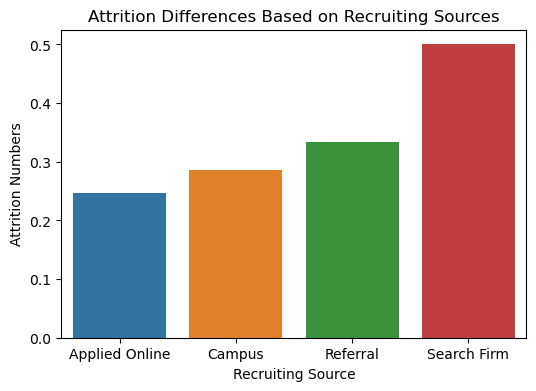

In [27]:
# Plotting attrition
plt.figure(figsize=(6, 4))
sns.barplot(x='recruiting_source', y='attrition', data=avg_attrition_by_source_df)
plt.title('Attrition Differences Based on Recruiting Sources')
plt.xlabel('Recruiting Source')
plt.ylabel('Attrition Numbers')
plt.show()

Applied Online and Campus recruitment show lower attrition rates, making them the best sources for stable retention. While Search Firm show highest attrition that indicates they are the least stable source.

In [28]:
# Assuming avg_sales_by_source is a Series, convert it to a DataFrame
avg_sales_by_source_df = avg_sales_by_source.reset_index()

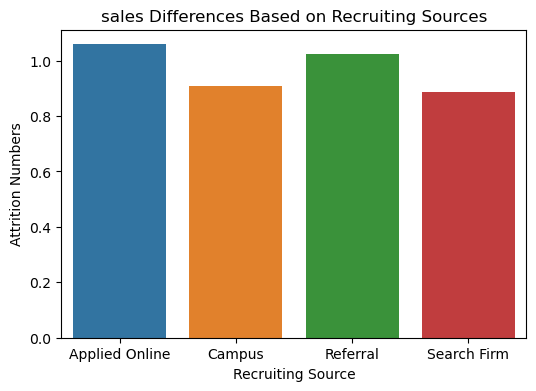

In [29]:
# Plotting sales difference
plt.figure(figsize=(6, 4))
sns.barplot(x='recruiting_source', y='sales_quota_pct', data=avg_sales_by_source_df)
plt.title('sales Differences Based on Recruiting Sources')
plt.xlabel('Recruiting Source')
plt.ylabel('Attrition Numbers')
plt.show()

Applied Online and Referral shows the highest average sales performance. This suggests that these recruiting sources are effective in bringing in high-performing sales employees.

Campus and Search Firm shows slightly lower average sales performance compared to Applied Online and Referral. However their performance is still strong, indicating that they are also valuable recruiting sources.